In [1]:
import cantera as ct
import matplotlib.pyplot as plt
import numpy as np
import rmgpy.constants
import adsorbate_thermo
import rmgpy.species

In [2]:
gas1 = ct.Solution('methane_pox_on_pt.cti')
surf1 = ct.Interface('methane_pox_on_pt.cti', 'Pt_surf', [gas1])

In [3]:
gas1.TPX = 300, 101325, {'H2O': 1.0}

In [4]:
# surf1.TPX = 300, 101325, {'H2O(S)': 0.1, 'PT(S)': 0.9}
surf1.TPX = 300, 101325, {'H2O(S)': 1.0}

In [5]:
surf1.species()[2].thermo.coeffs
midpoint = surf1.species()[2].thermo.coeffs[0]
a_high = surf1.species()[2].thermo.coeffs[1:8]
a_low = surf1.species()[2].thermo.coeffs[8:]

In [6]:
molecular_weight = 18.02
frequencies = [49.5, 68.6, 73.6, 102.0, 437.6, 452.9, 1596.3, 3675.6, 3787.0]
composition = {'H': 2, 'O': 1, 'C': 0, 'N': 0}
heat_of_formation_0K = -259.05  # kJ/mol
my_calc = adsorbate_thermo.AdsorbateThermoCalc(molecular_weight, frequencies, composition, heat_of_formation_0K, twoD_gas=True)
a_low2, a_high2 = my_calc.get_thermo2()

In [7]:
temperatures = np.linspace(300, 2000, 201)
cp_fit, h_fit, s_fit = my_calc.get_thermo_from_NASA2(a_low, a_high)

In [8]:
H_ct = np.zeros(len(temperatures))
Cp_ct = np.zeros(len(temperatures))
S_ct = np.zeros(len(temperatures))
for i, T in enumerate(temperatures):
    surf1.TPX = T, 101325, {'H2O(S)': 1.0}
    Cp_ct[i] = surf1.cp_mole/1000.0
    H_ct[i] = surf1.enthalpy_mole/1000.0
    S_ct[i] = surf1.entropy_mole/1000.0

Text(0.5, 1.0, 'Heat Capacity vs. Temperature')

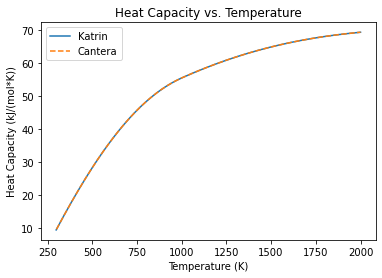

In [9]:
plt.plot(my_calc.temperatures, cp_fit)
plt.plot(temperatures, Cp_ct, linestyle='dashed')
plt.legend(['Katrin', 'Cantera'])
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (kJ/(mol*K))')
plt.title('Heat Capacity vs. Temperature')

In [10]:
plt.plot(my_calc.temperatures, s_fit2)
plt.plot(temperatures, S_ct, linestyle='dashed')
plt.legend(['Katrin', 'Cantera'])
plt.xlabel('Temperature (K)')
plt.ylabel('Entropy (kJ/(mol*K))')
plt.title('Entropy vs. Temperature')

NameError: name 's_fit2' is not defined

In [ ]:
plt.plot(my_calc.temperatures, h_fit)
plt.plot(temperatures, H_ct, linestyle='dashed')
plt.legend(['Katrin', 'Cantera'])
plt.xlabel('Temperature (K)')
plt.ylabel('Enthalpy (J/mol)')
plt.title('Enthalpy vs. Temperature')

In [11]:
plt.figure(figsize=(3, 3), dpi=80)
plt.plot(my_calc.temperatures, s_fit2)
plt.plot(temperatures, S_ct, linestyle='dashed')
plt.legend(['Katrin', 'Cantera'])
plt.xlabel('Temperature (K)')
plt.ylabel('Entropy (kJ/(mol*K))')
plt.title('Entropy vs. Temperature')


NameError: name 's_fit2' is not defined

<Figure size 240x240 with 0 Axes>

Text(0.5, 1.0, 'Enthalpy vs. Temperature')

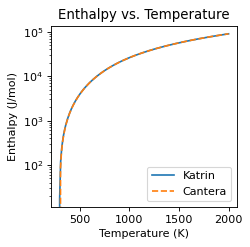

In [12]:
plt.figure(figsize=(3, 3), dpi=80)
plt.semilogy(my_calc.temperatures, h_fit- h_fit[0])
plt.semilogy(temperatures, H_ct - H_ct[0], linestyle='dashed')
plt.legend(['Katrin', 'Cantera'])
plt.xlabel('Temperature (K)')
plt.ylabel('Enthalpy (J/mol)')
plt.title('Enthalpy vs. Temperature')